In [2]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np

np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

Using TensorFlow backend.


In [3]:
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [3]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))

In [4]:
model.add(Flatten(name='flatten_1'))

#建立 Hidden layer¶
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))

#建立輸出層
model.add(Dense(10, activation='softmax', name='dense_2'))

In [5]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [6]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train4D_norm,  
                          y=y_TrainOneHot, 
                          validation_split=0.2,  
                          epochs=100, 
                          batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 17s 353us/step - loss: 0.3045 - accuracy: 0.9058 - val_loss: 0.0665 - val_accuracy: 0.9796
Epoch 2/100
48000/48000 [==============================] - 7s 151us/step - loss: 0.1057 - accuracy: 0.9680 - val_loss: 0.0518 - val_accuracy: 0.9856
Epoch 3/100
48000/48000 [==============================] - 7s 151us/step - loss: 0.0779 - accuracy: 0.9766 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 4/100
48000/48000 [==============================] - 8s 165us/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 5/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0366 - val_accuracy: 0.9899
Epoch 6/100
48000/48000 [==============================] - 8s 167us/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 7/100
48000/48000 [==============================

In [7]:
import matplotlib.pyplot as plt  

def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
  
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

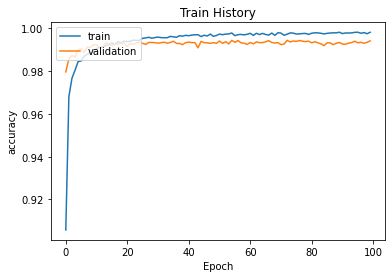

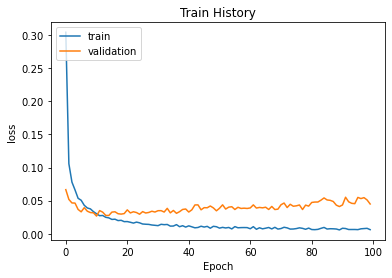

In [8]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')


In [ ]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm
